In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows with missing values
data = data.dropna()

# Define the features for clustering
features = data[['Spending Score (1-100)', 'Annual Income (k$)']]

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


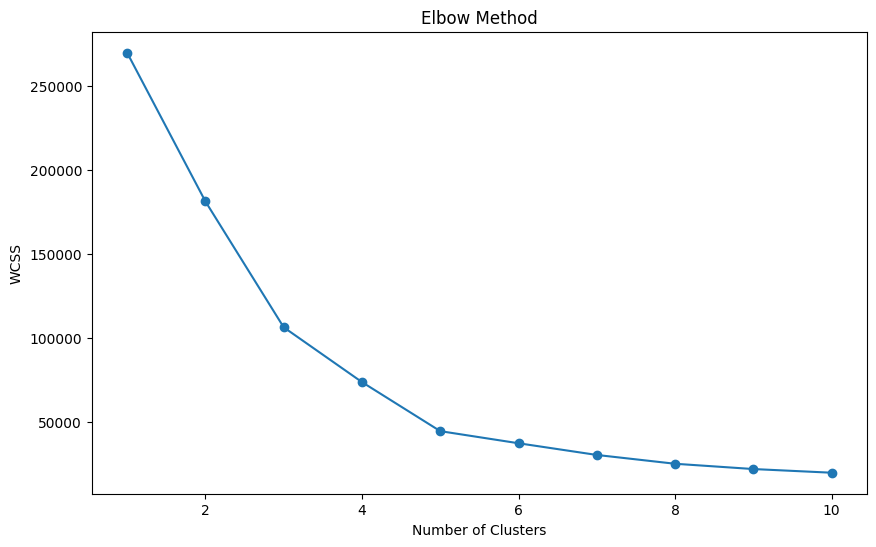

In [7]:
# Calculate the within-cluster sum of squares for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the original dataset
data['cluster'] = clusters

# Display the first few rows of the dataset with cluster labels
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


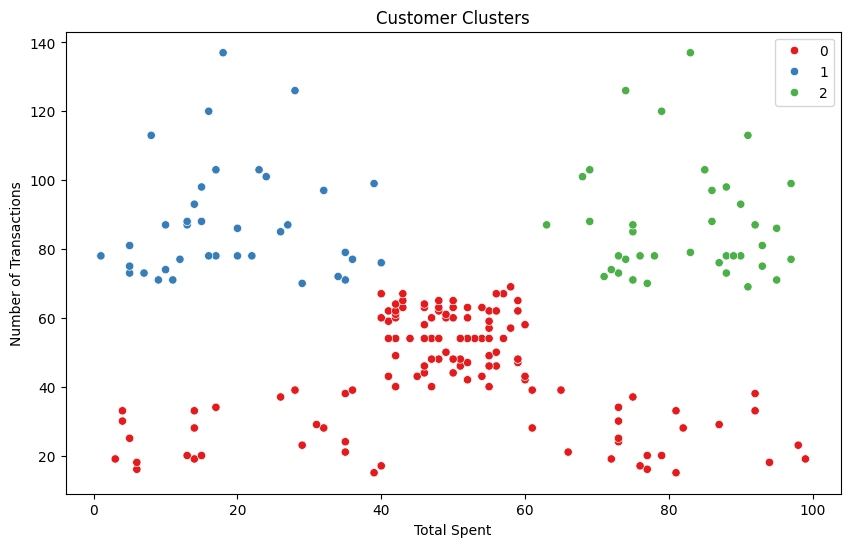

In [11]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', hue='cluster', data=data, palette='Set1')
plt.title('Customer Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()